In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
# import pickle

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# define model

def randomForestReg(df, df_name, met = True):
    
    if (met):
        
        X_met, y_met, X_metTrain, X_metTest, y_metTrain, y_metTest, X_full, y_full, X_fullTrain, X_fullTest, y_fullTrain, y_fullTest = encodingSplitting(df)

        model = RandomForestRegressor()

        grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

        grid_search.fit(X_metTrain, y_metTrain)
        best_grid = grid_search.best_estimator_
        # define the evaluation procedure
        cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
        # evaluate the model and collect the scores
        n_scores = cross_val_score(best_grid, X_metTest, y_metTest, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
        # force the scores to be positive
        n_scores = np.absolute(n_scores)
        # summarize performance

        #filename = 'rf_met_plasmAnt.pkl'
        #with open(filename, 'wb') as file:
        #    pickle.dump(grid_search.best_estimator_, file)

        print('Only Metabolic model ' + df_name + ': MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
        MAE = (np.mean(n_scores), np.std(n_scores))
        return(best_grid, MAE)

    else:
            
        X_met, y_met, X_metTrain, X_metTest, y_metTrain, y_metTest, X_full, y_full, X_fullTrain, X_fullTest, y_fullTrain, y_fullTest = encodingSplitting(df)

        model = RandomForestRegressor()

        grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                        cv = 3, n_jobs = -1, verbose = 2)

        grid_search.fit(X_fullTrain, y_fullTrain)
        best_grid = grid_search.best_estimator_
        # define the evaluation procedure
        cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
        # evaluate the model and collect the scores
        n_scores = cross_val_score(best_grid, X_fullTest, y_fullTest, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
        # force the scores to be positive
        n_scores = np.absolute(n_scores)
        # summarize performance

        #filename = 'rf_met_plasmAnt.pkl'
        #with open(filename, 'wb') as file:
        #    pickle.dump(grid_search.best_estimator_, file)

        print('Full model ' + df_name + ': MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
        MAE = (np.mean(n_scores), np.std(n_scores))
        return(best_grid, MAE)



ModuleNotFoundError: No module named 'main'

In [84]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
 
enc = OrdinalEncoder()
enc.fit(df[["Sweetener", "Sex", "Time"]])
df[["Sweetener", "Sex", "Time"]] = enc.transform(df[["Sweetener", "Sex",  "Time"]])

# Initial = 1, Final = 0

X, y = df[df["Time"] == 1].drop(["numVol", "Time"], axis=1), df[df["Time"] == 0].drop(['Time','numVol', 'Sweetener', 'Time', 'Sex', 'Weight','BMI', 'Fat', 'CVRI', 'Bpmin', 'Bpmax', 'Frec'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_full, y_full = df[df["Time"] == 1].drop(["numVol", "Time"], axis=1), df[df["Time"] == 0].drop(['Time','numVol', 'Sweetener', 'Time'], axis = 1)
X_fulltrain, X_fulltest, y_fulltrain, y_fulltest = train_test_split(X_full, y_full, test_size=0.3, random_state=42)

#X_test.to_csv("X_met_test_urineAnt.csv", index=False)
#X_fulltest.to_csv("X_full_test_urineAnt.csv",index=False)

In [9]:
df1Num = df[df.select_dtypes(include=np.number).drop("numVol",1).columns]

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0.005)
selector.fit(df1Num)
df1Num.columns[selector.get_support()]

C:\Users\dres2\AppData\Local\Temp\ipykernel_10296\3624912679.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1Num = df[df.select_dtypes(include=np.number).drop("numVol",1).columns]


Index(['CA', 'CA.G', 'CA.S', 'CA.GS', 'Total.CA', 'DHPAA', 'DHPAA.G',
       'DHPAA.GG', 'DHPAA.GS', 'DHPAA.SS', 'Total.DHPAA', 'TFA.S',
       'TFA.di.sulfate.1', 'Total.TFA', 'VA', 'VA.GG', 'VA.GS', 'VA.SS',
       'Total.VA', 'Sweetener', 'Time', 'Sex', 'Weight', 'BMI', 'Fat', 'CVRI',
       'Bpmin', 'Bpmax', 'Frec'],
      dtype='object')

In [14]:
# 2. Univariate Feature Selection with SelectKBest

#Divide the features into Independent and Dependent Variable
X = df1Num.drop('CA' , axis =1)
y = df1Num['CA']

from sklearn.feature_selection import SelectKBest, mutual_info_regression

selector = SelectKBest(mutual_info_regression, k =5)
selector.fit(X, y)
X.columns[selector.get_support()]

Index(['CA.G', 'CA.S', 'CA.GS', 'TFA.di.sulfate.1', 'VA.GG'], dtype='object')

In [4]:
# 3. RFE Selector

X = df1.drop(['Sex', "Sweetener", "numVol", "Time"] , axis =1)
y = df1['Sex']

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# #Selecting the Best important features according to Logistic Regression
rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 2, step = 1)
rfe_selector.fit(X, y)
X.columns[rfe_selector.get_support()]

Index(['Weight', 'Fat'], dtype='object')

In [5]:
from sklearn.feature_selection import SelectFromModel

X = df1.drop(['Sex', "Sweetener", "numVol", "Time"] , axis =1)
y = df1['Sex']
# #Selecting the Best important features according to Logistic Regression using SelectFromModel
sfm_selector = SelectFromModel(estimator=LogisticRegression())
sfm_selector.fit(X, y)
X.columns[sfm_selector.get_support()]

Index(['CA.GS', 'DHPAA', 'DHPAA.G', 'DHPAA.GG', 'TFA.G', 'TFA.S',
       'TFA.di.sulfate.1', 'Total.TFA', 'VA.GS'],
      dtype='object')

In [6]:
from sklearn.feature_selection import SequentialFeatureSelector
#Selecting the Best important features according to Logistic Regression
sfs_selector = SequentialFeatureSelector(estimator=LogisticRegression(), n_features_to_select = 3, cv =10, direction ='backward')
sfs_selector.fit(X, y)
X.columns[sfs_selector.get_support()]

Index(['CA.GS', 'TFA.di.sulfate.1', 'VA.GS'], dtype='object')

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

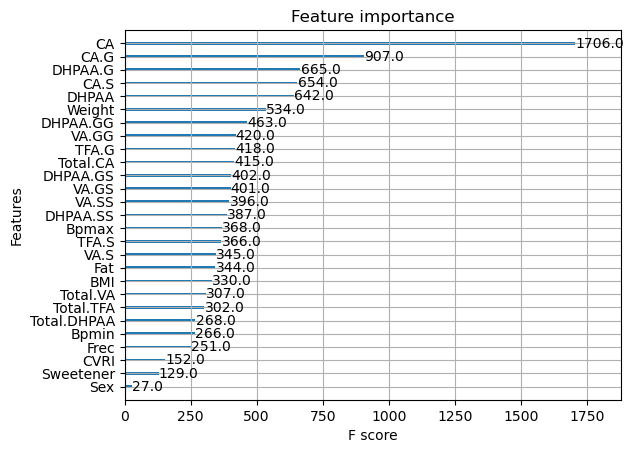

In [85]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_absolute_error
import numpy as np
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

thresholds = np.sort(model.feature_importances_)
results = pd.DataFrame()
for thresh in thresholds:
 # select features using threshold
 selection = SelectFromModel(model, threshold=thresh, prefit=True)
 feature_idx = selection.get_support()
 print(X_train.columns[feature_idx])
 select_X_train = selection.transform(X_train)
 # train model
 selection_model = XGBRegressor()
 selection_model.fit(select_X_train, y_train)
 # eval model
 select_X_test = selection.transform(X_test)
 y_pred = selection_model.predict(select_X_test)
 predictions = [value for value in y_pred]
 mae = mean_absolute_error(y_test, predictions)
 result1 = pd.DataFrame({"thresh": thresh, "n":select_X_train.shape[1], "MAE":mae}, index = [30 - select_X_train.shape[1]])
 results = pd.concat([results, result1])
 #print("Thresh=%.3f, n=%d, MAE: %.4f" % (thresh, select_X_train.shape[1], accuracy))

print(results)

Index(['E', 'E.S', 'Total.E', 'HE.G', 'N.G', 'Sweetener', 'Sex', 'Weight',
       'BMI', 'Fat', 'CVRI', 'Bpmin', 'Bpmax', 'Frec'],
      dtype='object')
Index(['E', 'E.S', 'Total.E', 'HE.G', 'N.G', 'Sweetener', 'Weight', 'BMI',
       'Fat', 'CVRI', 'Bpmin', 'Bpmax', 'Frec'],
      dtype='object')


c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['E', 'E.S', 'HE.G', 'N.G', 'Sweetener', 'Weight', 'BMI', 'Fat', 'CVRI',
       'Bpmin', 'Bpmax', 'Frec'],
      dtype='object')
Index(['E', 'E.S', 'HE.G', 'Sweetener', 'Weight', 'BMI', 'Fat', 'CVRI',
       'Bpmin', 'Bpmax', 'Frec'],
      dtype='object')


c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warning

Index(['E', 'E.S', 'HE.G', 'Sweetener', 'Weight', 'BMI', 'Fat', 'Bpmin',
       'Bpmax', 'Frec'],
      dtype='object')
Index(['E', 'E.S', 'HE.G', 'Weight', 'BMI', 'Fat', 'Bpmin', 'Bpmax', 'Frec'], dtype='object')
Index(['E', 'E.S', 'HE.G', 'Weight', 'BMI', 'Fat', 'Bpmax', 'Frec'], dtype='object')
Index(['E', 'E.S', 'HE.G', 'Weight', 'Fat', 'Bpmax', 'Frec'], dtype='object')


c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warning

Index(['E', 'E.S', 'HE.G', 'Fat', 'Bpmax', 'Frec'], dtype='object')
Index(['E', 'HE.G', 'Fat', 'Bpmax', 'Frec'], dtype='object')


c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['E', 'HE.G', 'Fat', 'Bpmax'], dtype='object')
Index(['E', 'HE.G', 'Fat'], dtype='object')
Index(['E', 'HE.G'], dtype='object')
Index(['HE.G'], dtype='object')
      thresh   n       MAE
16  0.016620  14  0.065645
17  0.018201  13  0.065580
18  0.034894  12  0.065201
19  0.036838  11  0.064944
20  0.055470  10  0.067062
21  0.059575   9  0.066301
22  0.064682   8  0.069406
23  0.064744   7  0.065572
24  0.064968   6  0.067723
25  0.068138   5  0.062560
26  0.103400   4  0.067119
27  0.115108   3  0.065457
28  0.137425   2  0.059420
29  0.159936   1  0.064163


c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [86]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np

modelRF = RandomForestRegressor()
modelRF.fit(X_train, y_train)

thresholds = np.sort(modelRF.feature_importances_)
results = pd.DataFrame()
for thresh in thresholds:
 # select features using threshold
 selection = SelectFromModel(modelRF, threshold=thresh, prefit=True)
 feature_idx = selection.get_support()
 print(X_train.columns[feature_idx])
 select_X_train = selection.transform(X_train)
 # train model
 selection_model = RandomForestRegressor()
 selection_model.fit(select_X_train, y_train)
 # eval model
 select_X_test = selection.transform(X_test)
 y_pred = selection_model.predict(select_X_test)
 predictions = [value for value in y_pred]
 mae = mean_absolute_error(y_test, predictions)
 result1 = pd.DataFrame({"thresh": thresh, "n":select_X_train.shape[1], "MAE":mae}, index = [30 - select_X_train.shape[1]])
 results = pd.concat([results, result1])
 #print("Thresh=%.3f, n=%d, MAE: %.4f" % (thresh, select_X_train.shape[1], accuracy))

print(results)

Index(['E', 'E.S', 'Total.E', 'HE.G', 'N.G', 'Sweetener', 'Sex', 'Weight',
       'BMI', 'Fat', 'CVRI', 'Bpmin', 'Bpmax', 'Frec'],
      dtype='object')


c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['E', 'E.S', 'Total.E', 'HE.G', 'N.G', 'Sweetener', 'Weight', 'BMI',
       'Fat', 'CVRI', 'Bpmin', 'Bpmax', 'Frec'],
      dtype='object')


c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['E', 'E.S', 'HE.G', 'N.G', 'Sweetener', 'Weight', 'BMI', 'Fat', 'CVRI',
       'Bpmin', 'Bpmax', 'Frec'],
      dtype='object')


c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['E', 'HE.G', 'N.G', 'Sweetener', 'Weight', 'BMI', 'Fat', 'CVRI',
       'Bpmin', 'Bpmax', 'Frec'],
      dtype='object')


c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['E', 'HE.G', 'N.G', 'Weight', 'BMI', 'Fat', 'CVRI', 'Bpmin', 'Bpmax',
       'Frec'],
      dtype='object')


c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['E', 'HE.G', 'N.G', 'Weight', 'BMI', 'Fat', 'CVRI', 'Bpmin', 'Bpmax'], dtype='object')


c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['E', 'HE.G', 'N.G', 'Weight', 'BMI', 'Fat', 'Bpmin', 'Bpmax'], dtype='object')


c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['E', 'HE.G', 'N.G', 'Weight', 'Fat', 'Bpmin', 'Bpmax'], dtype='object')


c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['E', 'HE.G', 'N.G', 'Fat', 'Bpmin', 'Bpmax'], dtype='object')


c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['E', 'HE.G', 'N.G', 'Fat', 'Bpmin'], dtype='object')


c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['HE.G', 'N.G', 'Fat', 'Bpmin'], dtype='object')
Index(['HE.G', 'N.G', 'Bpmin'], dtype='object')


c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['HE.G', 'N.G'], dtype='object')


c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['HE.G'], dtype='object')
      thresh   n       MAE
16  0.006328  14  0.057022
17  0.021449  13  0.059633
18  0.030914  12  0.057402
19  0.035002  11  0.059542
20  0.051101  10  0.059265
21  0.064657   9  0.058500
22  0.073626   8  0.059478
23  0.078158   7  0.060532
24  0.082583   6  0.062865
25  0.089350   5  0.064209
26  0.094154   4  0.060081
27  0.101714   3  0.064947
28  0.120238   2  0.068160
29  0.150725   1  0.056302


c:\Users\dres2\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


AttributeError: 'SelectFromModel' object has no attribute 'feature_names_in_'

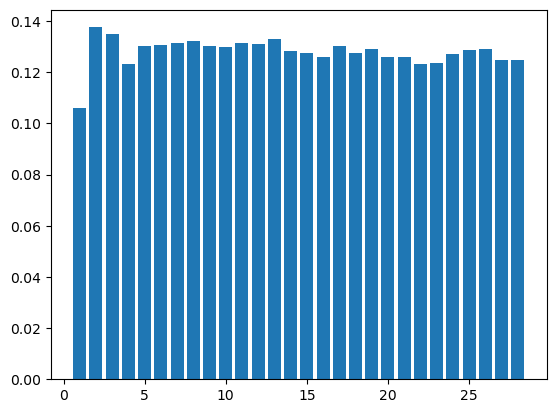

In [62]:
from matplotlib import pyplot

pyplot.bar(results["n"], results["MAE"])
pyplot.show()